In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import wget
from mpl_toolkits.basemap import Basemap
import folium

In [2]:
df = pd.read_csv('ev_stations_v1.csv')

C:\Users\123\AppData\Local\Temp\ipykernel_51632\2543006928.py:1: DtypeWarning: Columns (6,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ev_stations_v1.csv')


In [3]:
selected_columns = ["Station Name", "Street Address", "City", "State", "ZIP", "Station Phone", "Groups With Access Code", 
                    "Access Days Time", "EV Level2 EVSE Num", "EV Network", "Geocode Status", "Date Last Confirmed", 
                    "ID", "Owner Type Code", "Open Date", "EV Connector Types", "Access Code", "Facility Type", "EV Pricing"]

In [4]:
df2 = df[['City', 'State']] # State and City

state = df2['State'].value_counts()
city = df2['City'].value_counts()

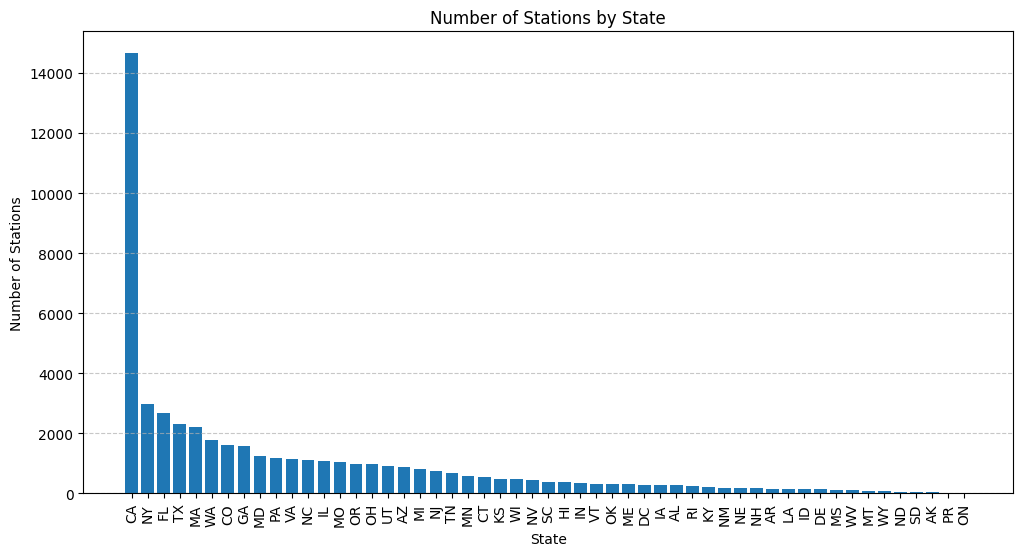

In [5]:
# Bar plot of number of stations by state
plt.figure(figsize=(12, 6))
plt.bar(state.index, state.values)
plt.xlabel("State")
plt.ylabel("Number of Stations")
plt.title("Number of Stations by State")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=90)
plt.show()

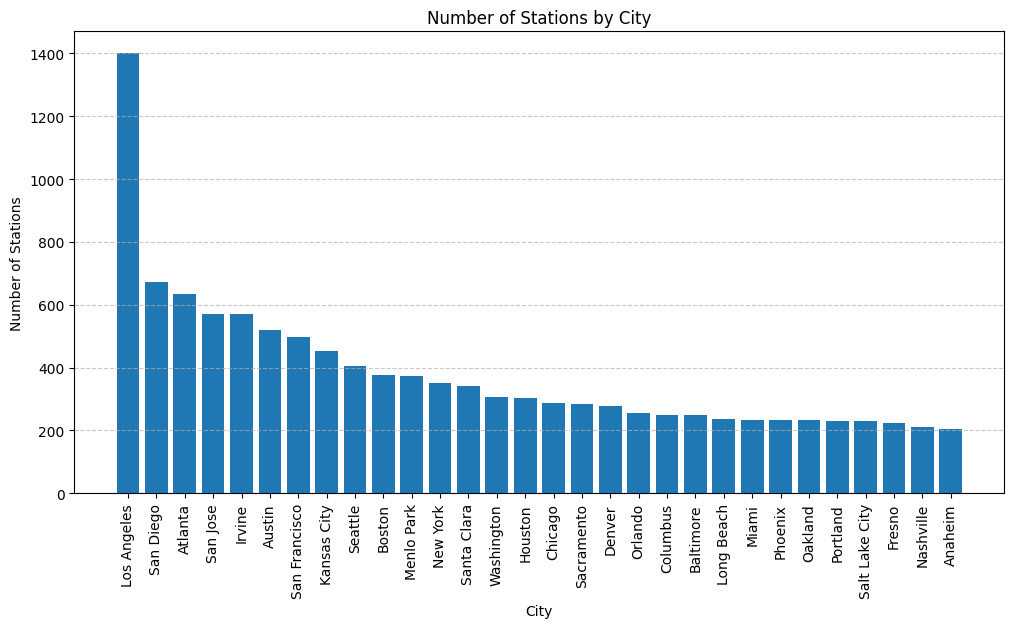

In [11]:
# Bar plot of number of stations by city
city_filtered = city[:30]
plt.figure(figsize=(12, 6))
plt.bar(city_filtered.index, city_filtered.values)
plt.xlabel("City")
plt.ylabel("Number of Stations")
plt.title("Number of Stations by City")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=90)
plt.show()

In [6]:
coordinates = df.dropna(subset=['Latitude', 'Longitude'])
lats = coordinates['Latitude'].tolist()
lons = coordinates['Longitude'].tolist()

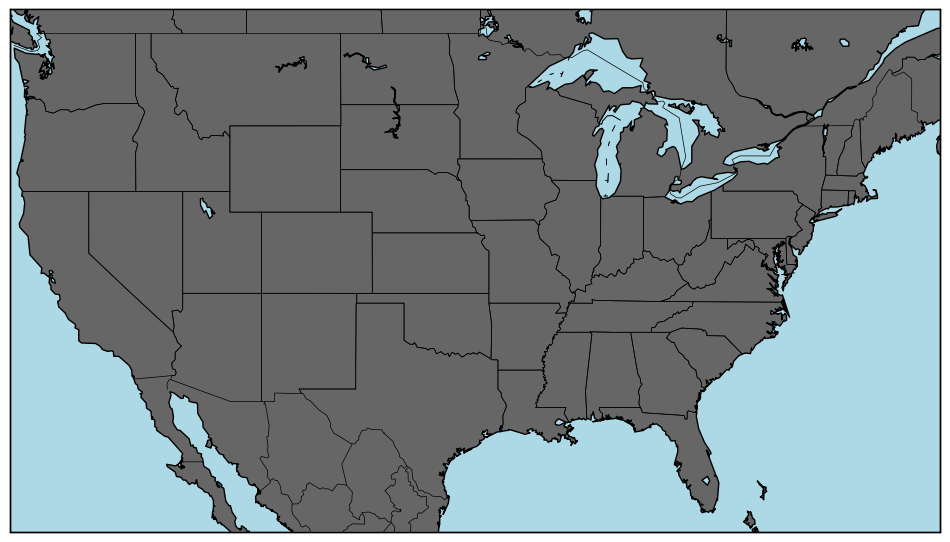

In [19]:
plt.figure(figsize=(12, 8))
USMap = Basemap(projection="merc", llcrnrlat=24, urcrnrlat=50, llcrnrlon=-125, urcrnrlon=-66, resolution="l")
USMap.drawcoastlines()
USMap.drawcountries()
USMap.drawstates()
USMap.fillcontinents(color="#666666", lake_color="lightblue")
USMap.drawmapboundary(fill_color="lightblue") # Map without Alaska and Hawaii :(

In [8]:
facility_type = df['Facility Type'].value_counts()

In [9]:
facility_type

Facility Type
HOTEL                        2559
CAR_DEALER                   2375
OFFICE_BLDG                   884
FED_GOV                       870
SHOPPING_CENTER               824
MUNI_GOV                      686
UTILITY                       542
SHOPPING_MALL                 474
COLLEGE_CAMPUS                473
PAY_GARAGE                    416
PARKING_LOT                   361
INN                           357
GROCERY                       352
PARKING_GARAGE                335
RESTAURANT                    305
CONVENIENCE_STORE             276
BREWERY_DISTILLERY_WINERY     254
PARK                          220
HOSPITAL                      211
SCHOOL                        183
OTHER_ENTERTAINMENT           172
NATL_PARK                     143
REC_SPORTS_FACILITY           127
AIRPORT                       124
STATE_GOV                     121
MULTI_UNIT_DWELLING           113
LIBRARY                       104
GAS_STATION                    96
MUSEUM                         85


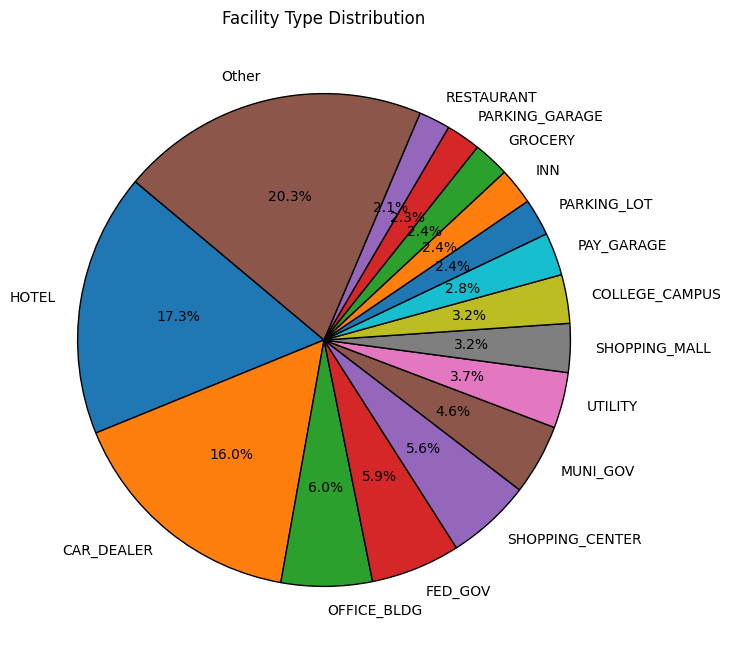

In [10]:
facility_type_labels = facility_type.index.to_list()
facility_type_sizes = facility_type.values.tolist()
threshold = 0.02 * sum(facility_type_sizes)
new_facility_type_labels = []
new_facility_type_sizes = []
other_total = 0
for label, size in zip(facility_type_labels, facility_type_sizes):
    if size < threshold:
        other_total += size
    else:
        new_facility_type_labels.append(label)
        new_facility_type_sizes.append(size)
new_facility_type_labels.append("Other")
new_facility_type_sizes.append(other_total)
plt.figure(figsize=(8, 8))
plt.pie(new_facility_type_sizes, labels=new_facility_type_labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Facility Type Distribution")
plt.show()

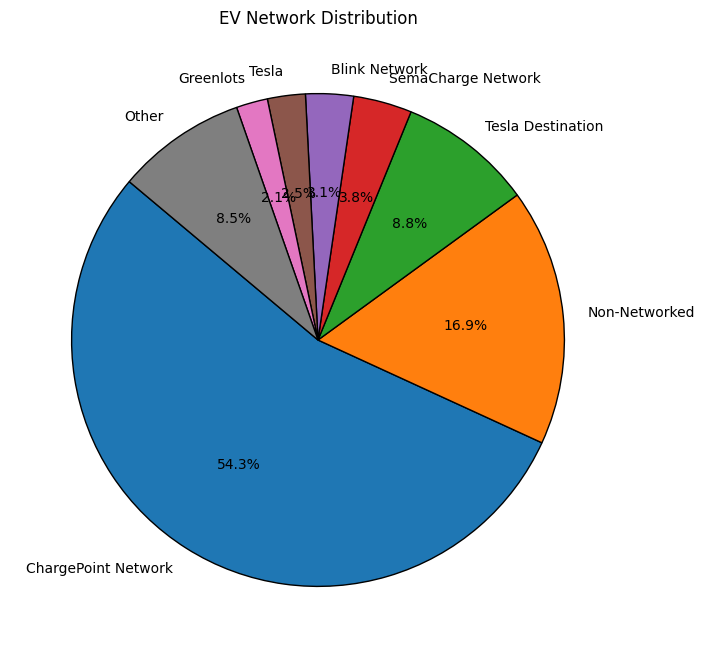

In [12]:
ev_network = df['EV Network'].value_counts()
ev_network
ev_network_labels = ev_network.index.to_list()
ev_network_sizes = ev_network.values.tolist()
threshold = 0.02 * sum(ev_network_sizes)
new_ev_network_labels = []
new_ev_network_sizes = []
other_total = 0
for label, size in zip(ev_network_labels, ev_network_sizes):
    if size < threshold:
        other_total += size
    else:
        new_ev_network_labels.append(label)
        new_ev_network_sizes.append(size)
new_ev_network_labels.append("Other")
new_ev_network_sizes.append(other_total)
plt.figure(figsize=(8, 8))
plt.pie(new_ev_network_sizes, labels=new_ev_network_labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("EV Network Distribution")
plt.show()

In [13]:
network_state_counts = df.groupby("State")["EV Network"].value_counts().unstack().fillna(0)

# plt.figure(figsize=(12, 8))
# sns.heatmap(network_state_counts, cmap="Blues", annot=False)
# plt.xlabel("EV Network")
# plt.ylabel("State")
# plt.title("EV Network Distribution by State")
# plt.show()

C:\Users\123\AppData\Local\Temp\ipykernel_51632\191565506.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_network_map["EV Network"] = ev_network_map["EV Network"].apply(lambda x: x if x in network_colors else "Other")


Text(0.5, 1.0, 'EV Network Distribution Across the U.S.')

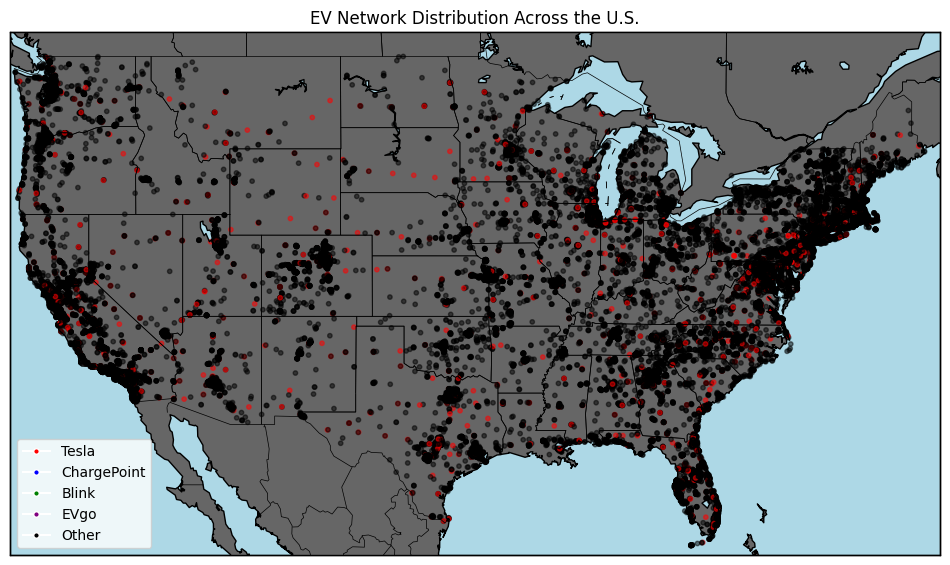

In [23]:
ev_network_map = df[df["EV Network"] != "Non-Networked"]
ev_network_map = df.dropna(subset=["Latitude", "Longitude", "EV Network"])

plt.figure(figsize=(12, 8))
USMap = Basemap(projection="merc", llcrnrlat=24, urcrnrlat=50, llcrnrlon=-125, urcrnrlon=-66, resolution="l")
USMap.drawcoastlines()
USMap.drawcountries()
USMap.drawstates()
USMap.fillcontinents(color="#666666", lake_color="lightblue")
USMap.drawmapboundary(fill_color="lightblue") # Map without Alaska and Hawaii :(
    
network_colors = {
    "Tesla": "red",
    "ChargePoint": "blue",
    "Blink": "green",
    "EVgo": "purple",
    "Other": "black"
}
ev_network_map["EV Network"] = ev_network_map["EV Network"].apply(lambda x: x if x in network_colors else "Other")

x, y = USMap(ev_network_map["Longitude"].values, ev_network_map["Latitude"].values)
colors = [network_colors[network] for network in ev_network_map["EV Network"].values]
plt.scatter(x, y, marker="o", c=colors, alpha=0.5, s=10)

plt.legend(handles=[plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=color, markersize=4, label=name) 
                    for name, color in network_colors.items()], loc="lower left")

plt.title("EV Network Distribution Across the U.S.")